In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#load dataset using seaborn built in titanic dataset
data = sns.load_dataset("titanic")

In [3]:
# display the first few rows of the dataset
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Check for missing values
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Fill missing 'age' with the median value
data['age'] = data['age'].fillna(data['age'].median())

In [6]:
# Fill missing 'embarked' with the most frequent port 'S'
# data['embarked'].mode()[0]
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [7]:
# Fill missing 'embark_town' with the most frequent port 'Southampton'
#data['embark_town'].mode()[0]
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

In [8]:
# drop "deck" (too many missing values) and unnessary columns (alive, class, who and embark_town)
data = data.drop(columns=['deck', 'alive', 'class', 'who', 'embark_town'])

In [9]:
# Check for missing values 
data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64

In [10]:
# Convert categorical columns (sex and embarked) to numeric
# data['sex'].unique()
# data['embarked'].unique()
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [11]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,2,True,False
1,1,1,0,38.0,1,0,71.2833,0,False,False
2,1,3,0,26.0,0,0,7.9250,2,False,True
3,1,1,0,35.0,1,0,53.1000,2,False,False
4,0,3,1,35.0,0,0,8.0500,2,True,True


In [12]:
# Define features and target variable ( x is feature variable,  y is target variable)
X = data.drop(columns='survived')
y = data['survived']              

In [13]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
# make predictions
y_pred = model.predict(X_test)

In [16]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [17]:
# print results for model evaluated
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



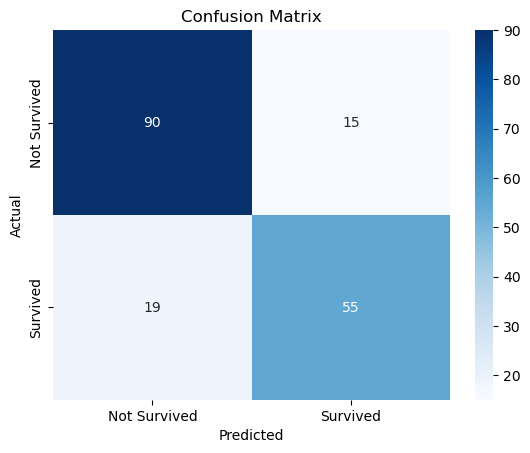

In [18]:
# Visualizing Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Display the importance of each feature
feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
             Coefficient
fare           0.003177
age           -0.012064
embarked      -0.182981
parch         -0.351667
sex           -0.437430
alone         -0.501174
sibsp         -0.541126
pclass        -0.861488
adult_male    -2.581415


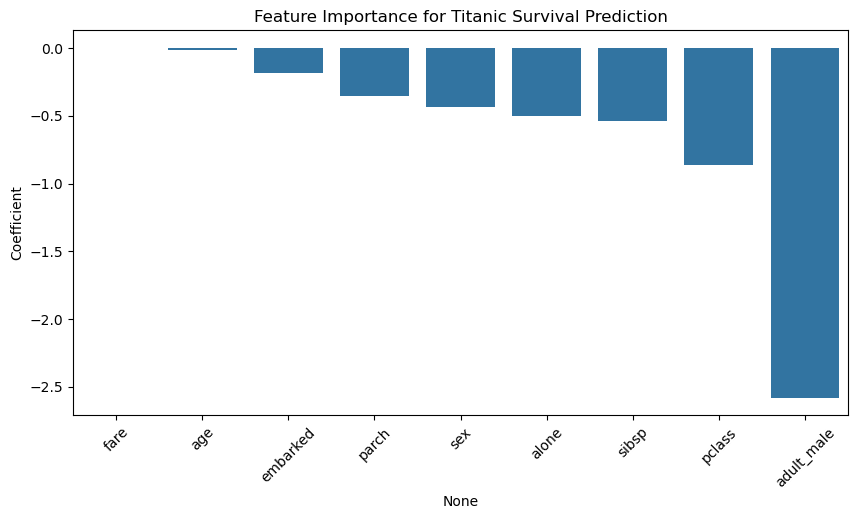

In [20]:
# Visualize feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.index, y=feature_importance['Coefficient'])
plt.xticks(rotation=45)
plt.title("Feature Importance for Titanic Survival Prediction")
plt.show()

In [24]:
# Predict Survival
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked, adult_male, alone):
    user_data = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked, adult_male, alone]], 
                             columns=X.columns)
    prediction = model.predict(user_data)[0]
    return "Survived" if prediction == 1 else "Did Not Survive"

# Example Prediction
print("Prediction Example:", predict_survival(3, 1, 25, 0, 0, 10, 2, 1, 1))

Prediction Example: Did Not Survive
